In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import bandit
import action_selection

# Multi-armed bandit

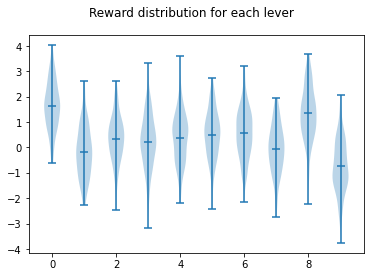

In [2]:
# Parameters
k = 10
episodes = 2000
steps = 1000

mab = bandit.MultiArmedBandit(k)
dist = np.empty([200, len(mab.bandits)])
for i in range(200):
    dist[i] = np.array([b.get_reward() for b in mab.bandits])

fig, ax = plt.subplots()
fig.suptitle("Reward distribution for each lever​")
ax.violinplot(dist, positions=np.arange(k), showmeans=True)
plt.show()

## Epsilon-greedy

In [3]:
def epsilon_greedy(mab, steps, epsilon):
    k = mab.k
    rewards = np.zeros(k)
    taken = np.zeros(k, dtype=np.int32)
    
    all_rewards = []
    all_actions = []

    for i in range(steps):
        action = action_selection.epsilon_greedy(rewards, epsilon)
        reward = mab.pull_lever(action)
        taken[action] += 1
        rewards[action] = rewards[action] + (1 / taken[action]) * (reward - rewards[action])
        all_rewards.append(reward)
        all_actions.append(action)
    
    return [np.argmax(rewards), all_rewards, all_actions]

In [4]:
# Results
epsilon_greedy_rewards = []
epsilon_greedy_actions = []
for epsilon in [0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 1]:
    episode_rewards = []
    episode_actions = []
    for episode in tqdm.tqdm(range(episodes), desc="Epsilon={:.2f}".format(epsilon)):
        mab = bandit.MultiArmedBandit(k)
        res = epsilon_greedy(mab, steps, epsilon)
        episode_rewards.append(res[1])
        episode_actions.append(np.where(res[2] == mab.best_lever(), 1, 0))
    
    df = pd.DataFrame(episode_rewards).T
    df["mean"] = df.mean(axis=1)
    epsilon_greedy_rewards.append(df)
    
    df = pd.DataFrame(episode_actions).T
    df["count"] = df.sum(axis=1)
    df["percent"] = df["count"] / episodes
    epsilon_greedy_actions.append(df)     

Epsilon=1.00: 100%|██████████| 2000/2000 [00:15<00:00, 132.30it/s]


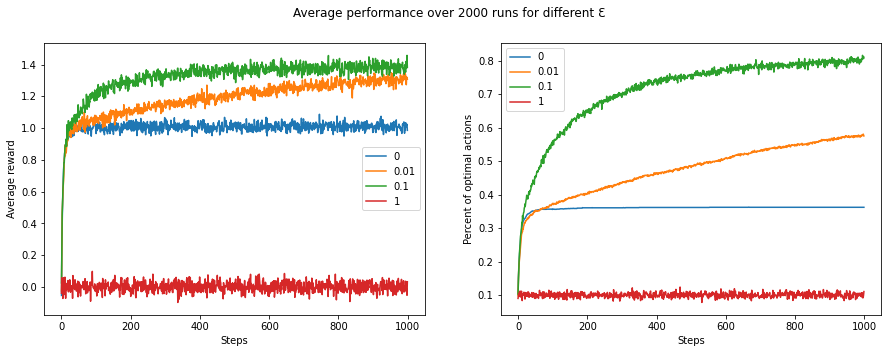

In [5]:
# Learning curves
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Average performance over {} runs for different Ɛ​".format(episodes))
axs[0].plot(epsilon_greedy_rewards[0]["mean"], label="0")       
axs[0].plot(epsilon_greedy_rewards[1]["mean"], label="0.01")    
axs[0].plot(epsilon_greedy_rewards[3]["mean"], label="0.1")     
axs[0].plot(epsilon_greedy_rewards[8]["mean"], label="1")       
axs[0].set_xlabel("Steps")
axs[0].set_ylabel("Average reward")
axs[0].legend()
axs[1].plot(epsilon_greedy_actions[0]["percent"], label="0")       
axs[1].plot(epsilon_greedy_actions[1]["percent"], label="0.01")    
axs[1].plot(epsilon_greedy_actions[3]["percent"], label="0.1")     
axs[1].plot(epsilon_greedy_actions[8]["percent"], label="1")       
axs[1].set_xlabel("Steps")
axs[1].set_ylabel("Percent of optimal actions")
axs[1].legend()
plt.show()

## Upper-Confidence-Bound

In [6]:
def upper_confidence_bound(mab, steps, c):
    k = mab.k
    rewards = np.zeros(k)
    taken = np.zeros(k, dtype=np.int32)
    
    all_rewards = []
    all_actions = []

    for t in range(steps):
        action = action_selection.ucb(rewards, taken, t, c)
        reward = mab.pull_lever(action)
        taken[action] += 1
        rewards[action] = rewards[action] + (1 / taken[action]) * (reward - rewards[action])
        all_rewards.append(reward)
        all_actions.append(action)
    
    return [np.argmax(rewards), all_rewards, all_actions]

In [7]:
# Results
ucb_rewards = []
ucb_actions = []
for c in [0.1, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]:
    episode_rewards = []
    episode_actions = []
    for episode in tqdm.tqdm(range(episodes), desc="C={:.1f}".format(c)):
        mab = bandit.MultiArmedBandit(k)
        res = upper_confidence_bound(mab, steps, c)
        episode_rewards.append(res[1])
        episode_actions.append(np.where(res[2] == mab.best_lever(), 1, 0))
    
    df = pd.DataFrame(episode_rewards).T
    df["mean"] = df.mean(axis=1)
    ucb_rewards.append(df)
    
    df = pd.DataFrame(episode_actions).T
    df["count"] = df.sum(axis=1)
    df["percent"] = df["count"] / episodes
    ucb_actions.append(df) 

C=4.0: 100%|██████████| 2000/2000 [02:25<00:00, 13.72it/s]


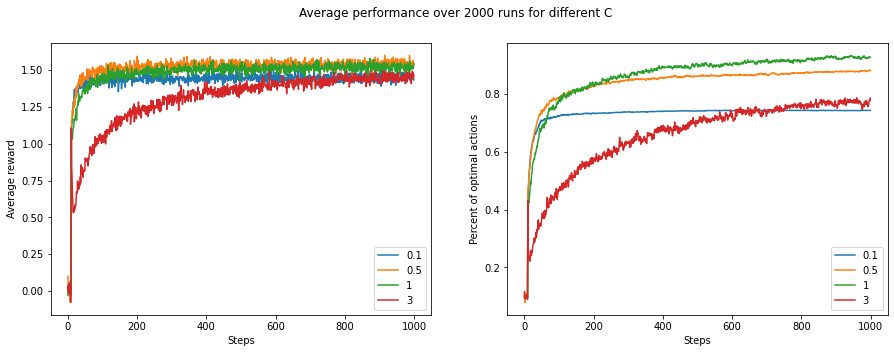

In [8]:
# Learning curves
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Average performance over {} runs for different C".format(episodes))
axs[0].plot(ucb_rewards[0]["mean"], label="0.1")
axs[0].plot(ucb_rewards[1]["mean"], label="0.5")
axs[0].plot(ucb_rewards[2]["mean"], label="1")
axs[0].plot(ucb_rewards[6]["mean"], label="3")
axs[0].set_xlabel("Steps")
axs[0].set_ylabel("Average reward")
axs[0].legend()
axs[1].plot(ucb_actions[0]["percent"], label="0.1")
axs[1].plot(ucb_actions[1]["percent"], label="0.5")
axs[1].plot(ucb_actions[2]["percent"], label="1")
axs[1].plot(ucb_actions[6]["percent"], label="3")
axs[1].set_xlabel("Steps")
axs[1].set_ylabel("Percent of optimal actions")
axs[1].legend()
plt.show()

## Softmax

In [9]:
def softmax(mab, steps, temp):
    k = mab.k
    rewards = np.zeros(k)
    taken = np.zeros(k, dtype=np.int32)
    
    all_rewards = []
    all_actions = []

    for t in range(steps):
        action = action_selection.softmax(rewards, temp)
        reward = mab.pull_lever(action)
        taken[action] += 1
        rewards[action] = rewards[action] + (1 / taken[action]) * (reward - rewards[action])
        all_rewards.append(reward)
        all_actions.append(action)
    
    return [np.argmax(rewards), all_rewards, all_actions]

In [10]:
# Results
softmax_rewards = []
softmax_actions = []
for t in [0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 1, 2, 5]:
    episode_rewards = []
    episode_actions = []
    for episode in tqdm.tqdm(range(episodes), desc="Temperature={:.1f}".format(t)):
        mab = bandit.MultiArmedBandit(k)
        res = softmax(mab, steps, t)
        episode_rewards.append(res[1])
        episode_actions.append(np.where(res[2] == mab.best_lever(), 1, 0))
    
    df = pd.DataFrame(episode_rewards).T
    df["mean"] = df.mean(axis=1)
    softmax_rewards.append(df)
    
    df = pd.DataFrame(episode_actions).T
    df["count"] = df.sum(axis=1)
    df["percent"] = df["count"] / episodes
    softmax_actions.append(df) 

Temperature=5.0: 100%|██████████| 2000/2000 [00:44<00:00, 45.29it/s]


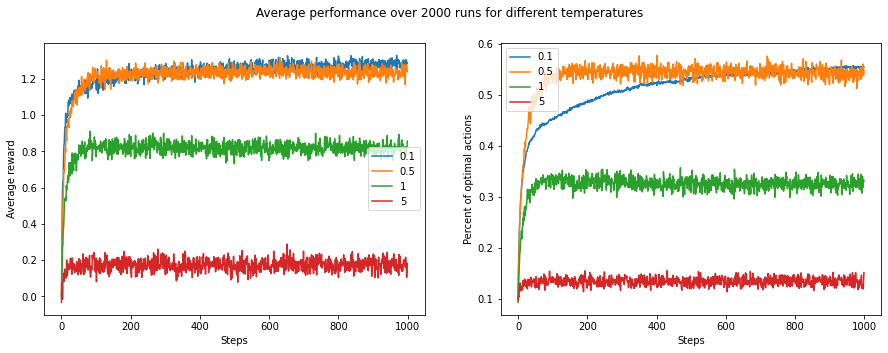

In [11]:
# Learning curves
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Average performance over {} runs for different temperatures".format(episodes))
axs[0].plot(softmax_rewards[0]["mean"], label="0.1")
axs[0].plot(softmax_rewards[4]["mean"], label="0.5")
axs[0].plot(softmax_rewards[6]["mean"], label="1")
axs[0].plot(softmax_rewards[8]["mean"], label="5")
axs[0].set_xlabel("Steps")
axs[0].set_ylabel("Average reward")
axs[0].legend()
axs[1].plot(softmax_actions[0]["percent"], label="0.1")
axs[1].plot(softmax_actions[4]["percent"], label="0.5")
axs[1].plot(softmax_actions[6]["percent"], label="1")
axs[1].plot(softmax_actions[8]["percent"], label="5")
axs[1].set_xlabel("Steps")
axs[1].set_ylabel("Percent of optimal actions")
axs[1].legend()
plt.show()